## Rain Prediction in Australia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['figure.facecolor'] = '#00000000'
pd.pandas.set_option('display.max_columns',None)
# pd.pandas.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


The dataset contains over 145,000 rows and 23 columns. The dataset contains date, numeric and categorical columns. Our objective is to create a model to predict the value in the column RainTomorrow.

Let's check the data types and missing values in the various columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.shape

(145460, 23)

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

# Explorartory Data Analysis

### Target Column

In [8]:
df.RainTomorrow.unique()

array(['No', 'Yes'], dtype=object)

In target column, less number of null values are present

In [9]:
df.RainTomorrow.value_counts()/len(df)*100

No     77.838153
Yes    22.161847
Name: RainTomorrow, dtype: float64

We can see that out of the total number of RainTomorrow values, No appears 75.83% times, Yes appears 21.91% times and 4% null values are present.

In [10]:
features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in features_with_nan:
    print(feature," has ", np.round(df[feature].isnull().mean(),4),"% of missing values")

MinTemp  has  0.0033 % of missing values
MaxTemp  has  0.0022 % of missing values
Evaporation  has  0.424 % of missing values
Sunshine  has  0.4745 % of missing values
WindGustDir  has  0.0651 % of missing values
WindGustSpeed  has  0.0647 % of missing values
WindDir9am  has  0.0686 % of missing values
WindDir3pm  has  0.0261 % of missing values
WindSpeed9am  has  0.0075 % of missing values
WindSpeed3pm  has  0.018 % of missing values
Humidity9am  has  0.0108 % of missing values
Humidity3pm  has  0.0249 % of missing values
Pressure9am  has  0.0976 % of missing values
Pressure3pm  has  0.0978 % of missing values
Cloud9am  has  0.3738 % of missing values
Cloud3pm  has  0.3984 % of missing values
Temp9am  has  0.0047 % of missing values
Temp3pm  has  0.0186 % of missing values


First Change the data type od Date feature

In [11]:
df.Date = pd.to_datetime(df.Date,format='%Y/%m/%d')

In [12]:
df.Date

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145454   2017-06-20
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
Name: Date, Length: 140787, dtype: datetime64[ns]

In [13]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Categorical Features

In [14]:
categorical_feature= [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_feature

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [15]:
for feature in categorical_feature:
    print(feature, ' contains',np.around(df[feature].isnull().mean(), 4),'% of missing values')

Location  contains 0.0 % of missing values
WindGustDir  contains 0.0651 % of missing values
WindDir9am  contains 0.0686 % of missing values
WindDir3pm  contains 0.0261 % of missing values
RainToday  contains 0.0 % of missing values
RainTomorrow  contains 0.0 % of missing values


In [16]:
for feature in categorical_feature:
    print(feature, ' contains',len(df[feature].unique()),'unique values')

Location  contains 49 unique values
WindGustDir  contains 17 unique values
WindDir9am  contains 17 unique values
WindDir3pm  contains 17 unique values
RainToday  contains 2 unique values
RainTomorrow  contains 2 unique values


<AxesSubplot:xlabel='Location', ylabel='Count'>

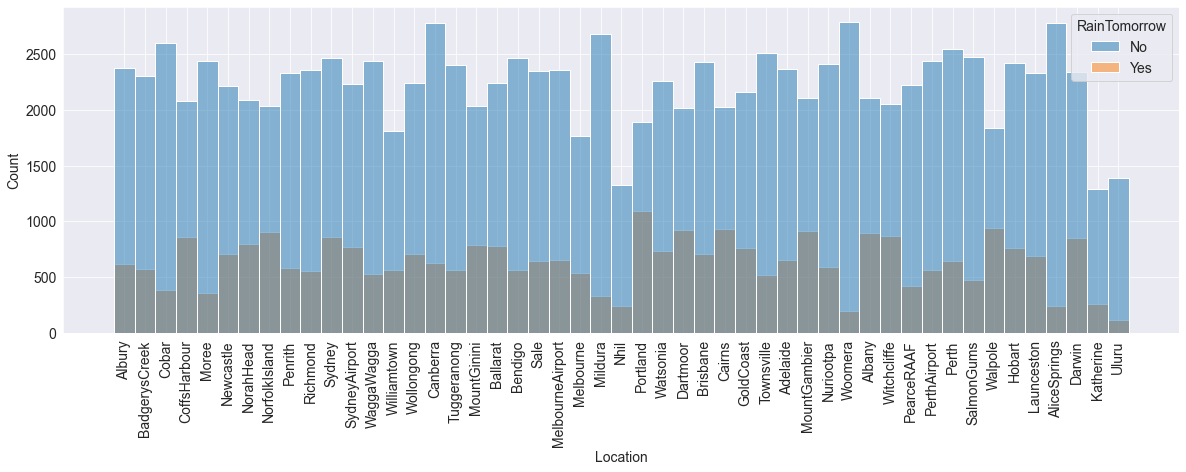

In [17]:
plt.xticks(rotation=90)
sns.histplot(x=df.Location,hue = 'RainTomorrow', data=df)

More rain is recorded in Portland and less rain is recorded in Uluru.

In [18]:
df.groupby(df.Location)['RainTomorrow'].size()

Location
Adelaide            3020
Albany              2996
Albury              2991
AliceSprings        3025
BadgerysCreek       2877
Ballarat            3017
Bendigo             3030
Brisbane            3132
Cairns              2964
Canberra            3402
Cobar               2980
CoffsHarbour        2940
Dartmoor            2939
Darwin              3192
GoldCoast           2924
Hobart              3183
Katherine           1545
Launceston          3020
Melbourne           2298
MelbourneAirport    3009
Mildura             3005
Moree               2791
MountGambier        3022
MountGinini         2816
Newcastle           2929
Nhil                1565
NorahHead           2888
NorfolkIsland       2944
Nuriootpa           2996
PearceRAAF          2646
Penrith             2911
Perth               3193
PerthAirport        3009
Portland            2984
Richmond            2906
Sale                2992
SalmonGums          2941
Sydney              3331
SydneyAirport       3001
Townsville      

<AxesSubplot:xlabel='WindGustDir', ylabel='Count'>

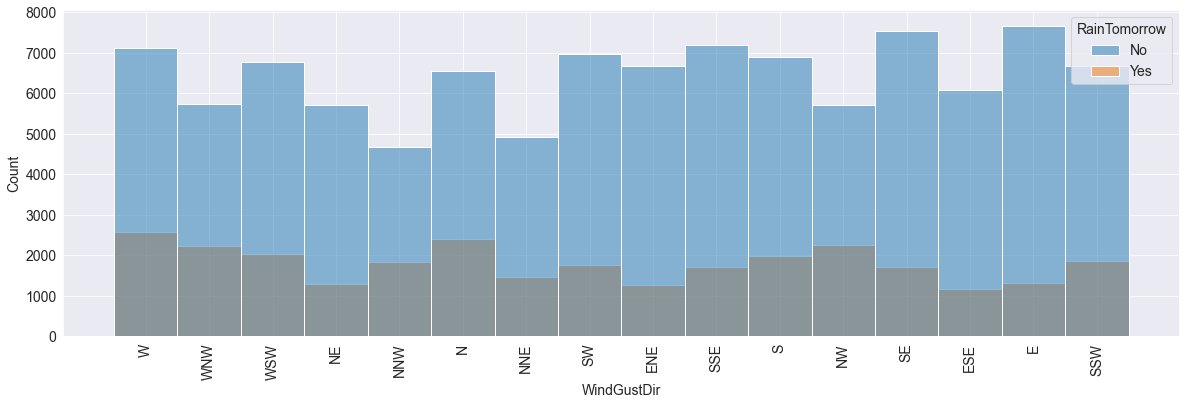

In [19]:
plt.xticks(rotation=90)
sns.histplot(x=df.WindGustDir, hue = 'RainTomorrow', data=df)

Most of the records of rain are from West followed by North

In [20]:
df.WindGustDir.value_counts().sort_values(ascending=False)

W      9696
SE     9241
E      8985
N      8941
SSE    8905
S      8859
WSW    8802
SW     8702
SSW    8541
WNW    7960
NW     7939
ENE    7924
ESE    7244
NE     7002
NNW    6511
NNE    6372
Name: WindGustDir, dtype: int64

In [21]:
df.WindDir9am.value_counts()

N      11266
SE      9116
E       8977
SSE     8901
NW      8471
S       8424
W       8207
SW      8160
NNE     7877
NNW     7782
ENE     7668
ESE     7518
NE      7477
SSW     7397
WNW     7100
WSW     6786
Name: WindDir9am, dtype: int64

<AxesSubplot:xlabel='WindDir9am', ylabel='Count'>

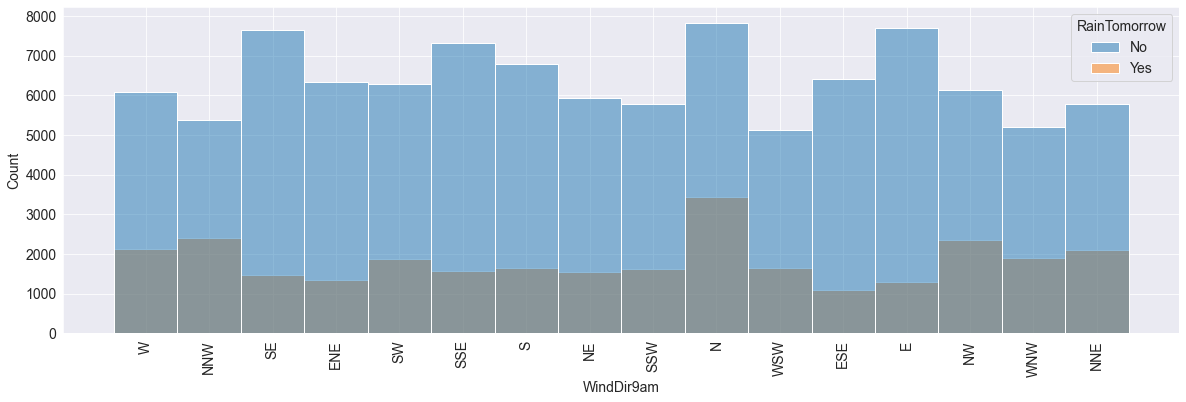

In [22]:
plt.xticks(rotation=90)
sns.histplot(x=df.WindDir9am,hue = 'RainTomorrow', data=df)

In [23]:
df.WindDir3pm.value_counts()

SE     10578
W       9810
S       9488
WSW     9231
SW      9104
SSE     9038
N       8593
WNW     8564
NW      8394
ESE     8311
E       8272
NE      8107
SSW     7945
NNW     7664
ENE     7645
NNE     6373
Name: WindDir3pm, dtype: int64

<AxesSubplot:xlabel='WindDir3pm', ylabel='Count'>

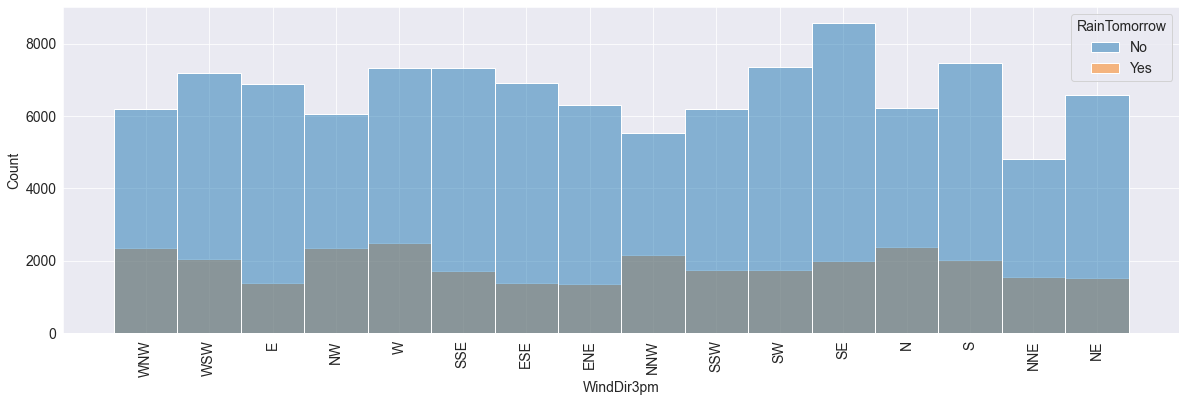

In [24]:
plt.xticks(rotation=90)
sns.histplot(x=df.WindDir3pm,hue = 'RainTomorrow', data=df)

In [25]:
df.RainToday.value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

<AxesSubplot:xlabel='RainToday', ylabel='Count'>

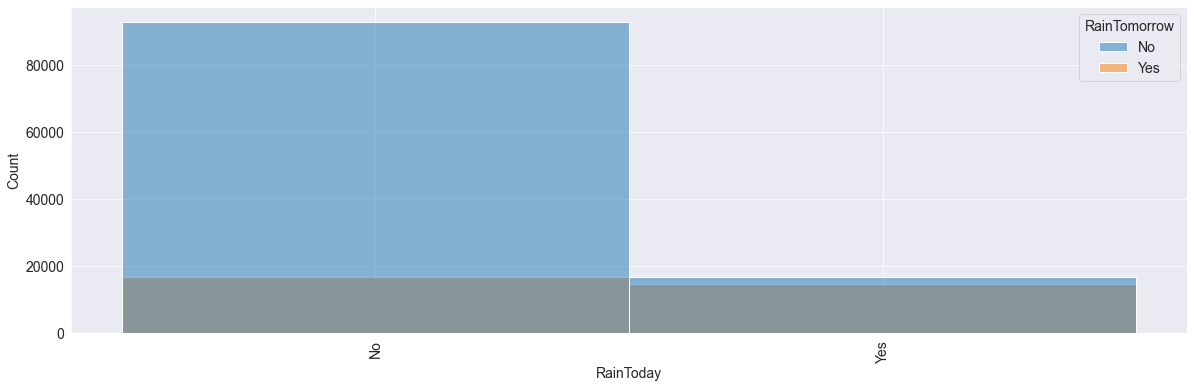

In [26]:
plt.xticks(rotation=90)
sns.histplot(x=df.RainToday,hue = 'RainTomorrow', data=df)

RainToday and RainTomorrow are positively correlated. 

### Conclusion:

## Numerical Features

In [27]:
numerical_feature = [feature for feature in df.columns if (df[feature].dtype !='O') and (df[feature].dtype !='datetime64[ns]')]
numerical_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [28]:
df[numerical_feature].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [29]:
for feature in numerical_feature:
    print(feature, ' contains',np.around(df[feature].isnull().mean(), 4),'% of missing values')

MinTemp  contains 0.0033 % of missing values
MaxTemp  contains 0.0022 % of missing values
Rainfall  contains 0.0 % of missing values
Evaporation  contains 0.424 % of missing values
Sunshine  contains 0.4745 % of missing values
WindGustSpeed  contains 0.0647 % of missing values
WindSpeed9am  contains 0.0075 % of missing values
WindSpeed3pm  contains 0.018 % of missing values
Humidity9am  contains 0.0108 % of missing values
Humidity3pm  contains 0.0249 % of missing values
Pressure9am  contains 0.0976 % of missing values
Pressure3pm  contains 0.0978 % of missing values
Cloud9am  contains 0.3738 % of missing values
Cloud3pm  contains 0.3984 % of missing values
Temp9am  contains 0.0047 % of missing values
Temp3pm  contains 0.0186 % of missing values


In [30]:
for feature in numerical_feature:
    print(feature, ' contains',len(df[feature].unique()),'unique values')

MinTemp  contains 390 unique values
MaxTemp  contains 504 unique values
Rainfall  contains 679 unique values
Evaporation  contains 356 unique values
Sunshine  contains 146 unique values
WindGustSpeed  contains 68 unique values
WindSpeed9am  contains 44 unique values
WindSpeed3pm  contains 45 unique values
Humidity9am  contains 102 unique values
Humidity3pm  contains 102 unique values
Pressure9am  contains 546 unique values
Pressure3pm  contains 549 unique values
Cloud9am  contains 11 unique values
Cloud3pm  contains 11 unique values
Temp9am  contains 441 unique values
Temp3pm  contains 501 unique values


In [31]:
df[numerical_feature].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140319.000000,140480.00000,140787.000000,81093.000000,73982.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000,138163.000000
mean,12.184824,23.23512,2.349974,5.472516,7.630540,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183
std,6.403879,7.11450,8.465173,4.189132,3.781729,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012,6.937784
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.30000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.10000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


### Discrete Features

In [32]:
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique())<100]
discrete_feature

['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Cloud9am', 'Cloud3pm']

In [33]:
for feature in discrete_feature:
    print(feature, ' contains',np.around(df[feature].isnull().mean(), 4),'% of missing values')

WindGustSpeed  contains 0.0647 % of missing values
WindSpeed9am  contains 0.0075 % of missing values
WindSpeed3pm  contains 0.018 % of missing values
Cloud9am  contains 0.3738 % of missing values
Cloud3pm  contains 0.3984 % of missing values


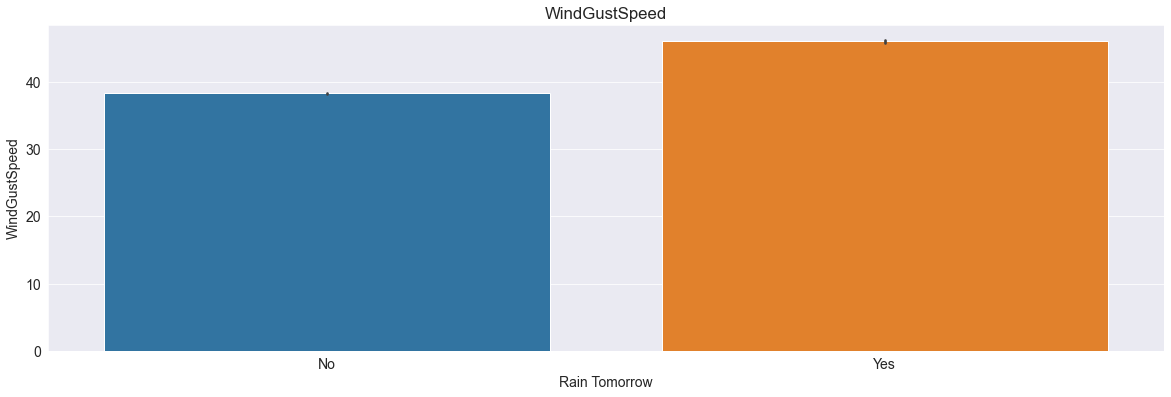

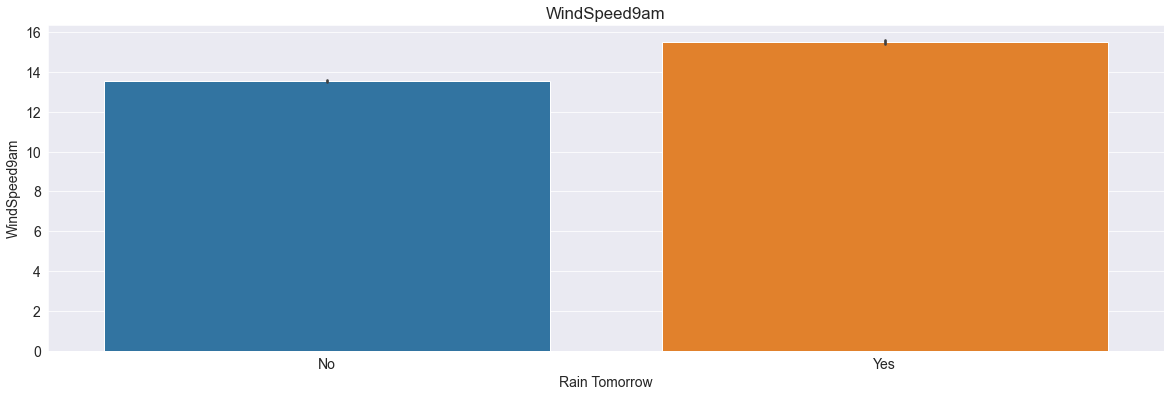

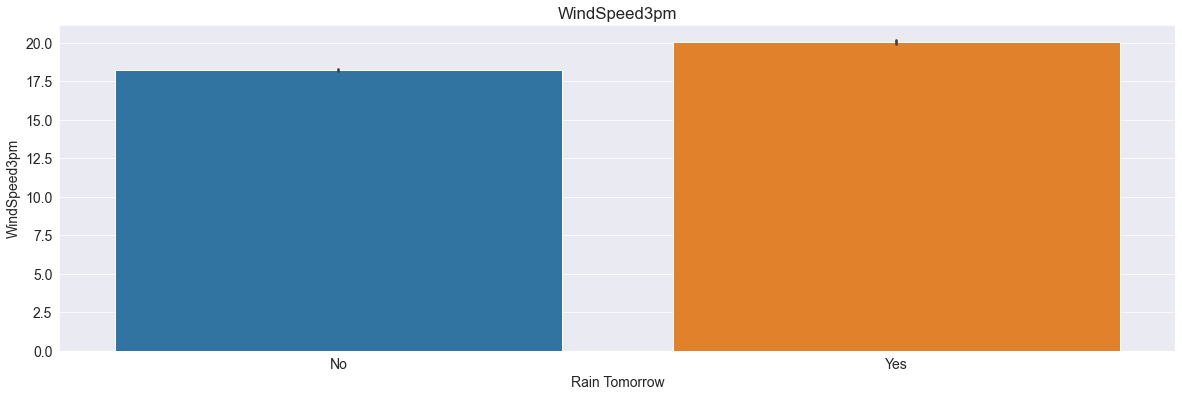

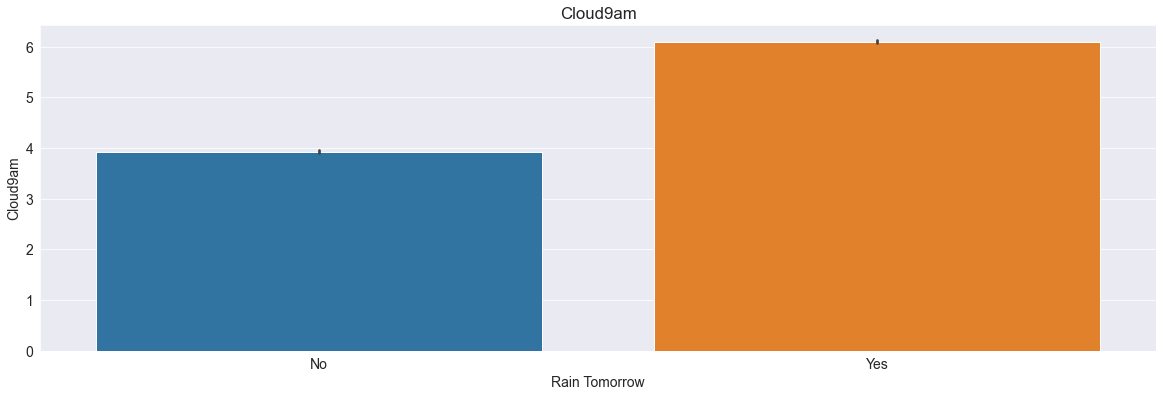

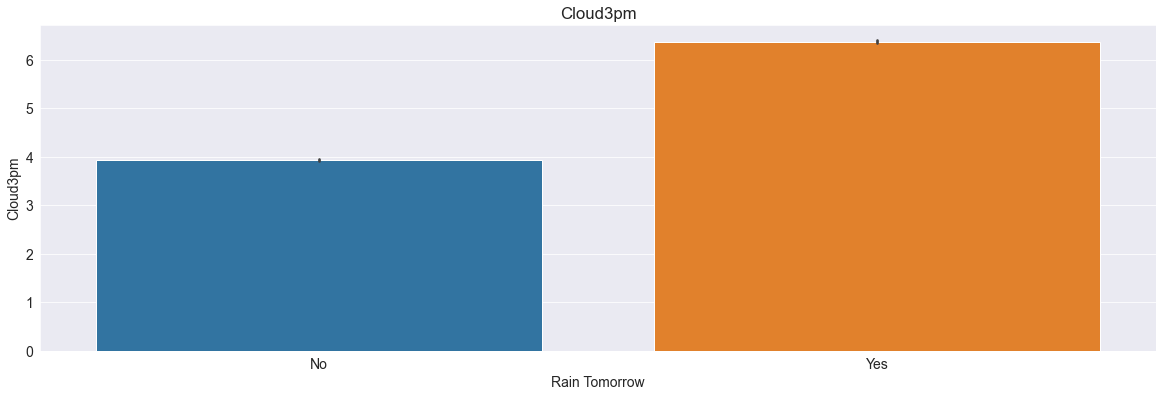

In [34]:
for feature in discrete_feature:
    sns.barplot(y = feature, x = 'RainTomorrow', data=df)
    plt.title(feature)
    plt.xlabel('Rain Tomorrow')
    plt.ylabel(feature)
    plt.show()

### Continuous Feature

In [35]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
continuous_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [36]:
for feature in continuous_feature:
    print(feature, ' contains',np.around(df[feature].isnull().mean(), 4),'% of missing values')

MinTemp  contains 0.0033 % of missing values
MaxTemp  contains 0.0022 % of missing values
Rainfall  contains 0.0 % of missing values
Evaporation  contains 0.424 % of missing values
Sunshine  contains 0.4745 % of missing values
Humidity9am  contains 0.0108 % of missing values
Humidity3pm  contains 0.0249 % of missing values
Pressure9am  contains 0.0976 % of missing values
Pressure3pm  contains 0.0978 % of missing values
Temp9am  contains 0.0047 % of missing values
Temp3pm  contains 0.0186 % of missing values


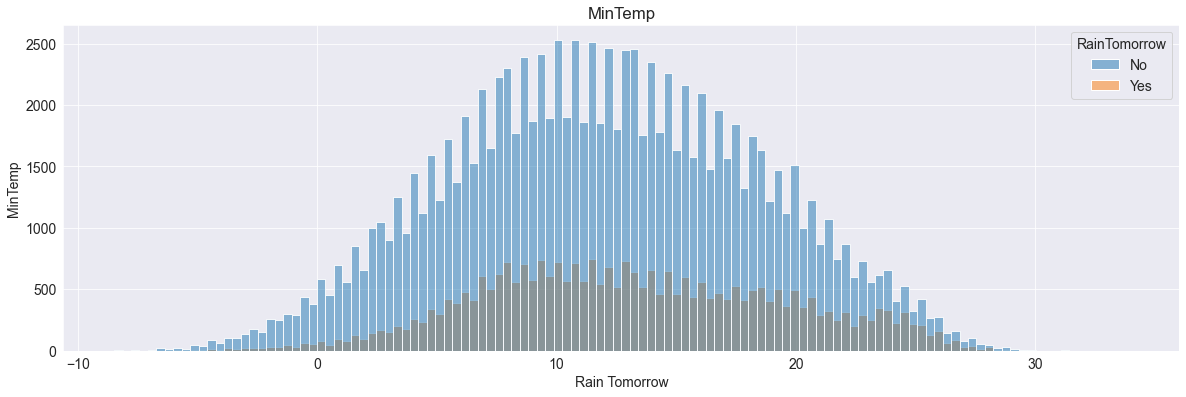

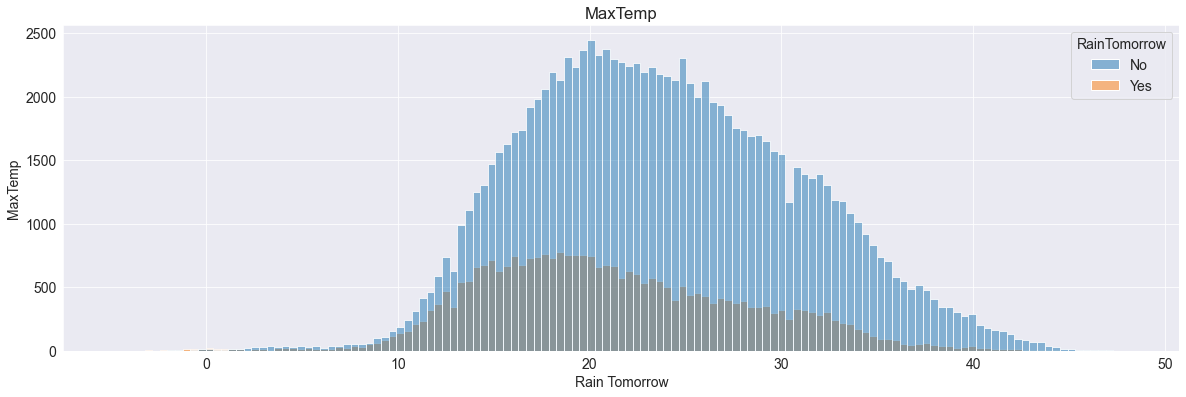

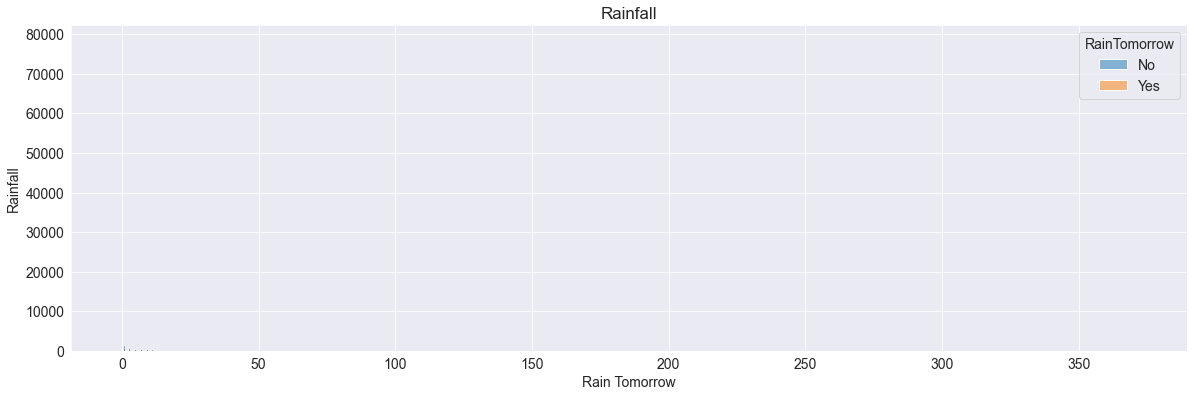

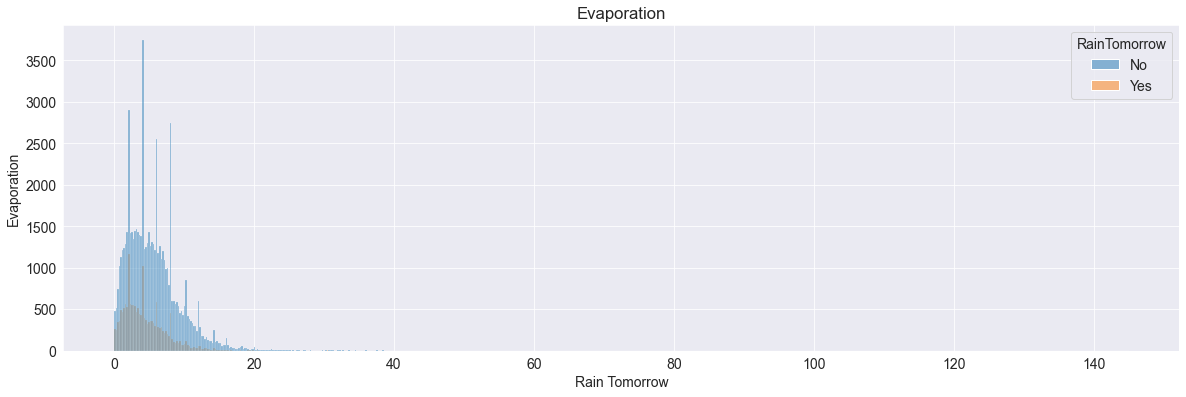

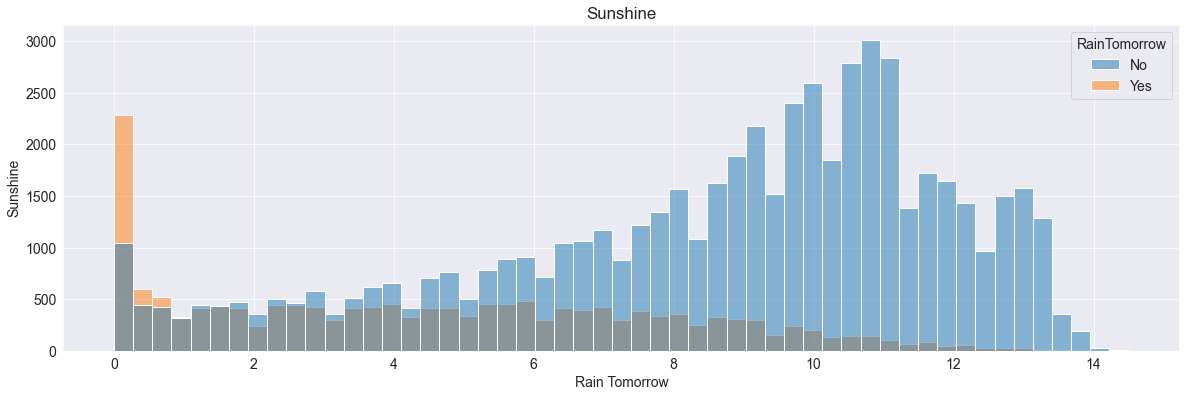

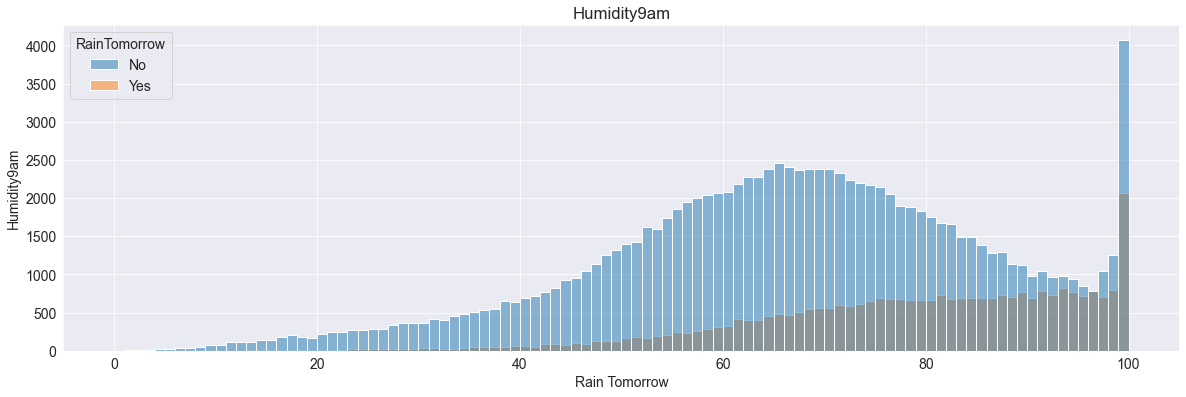

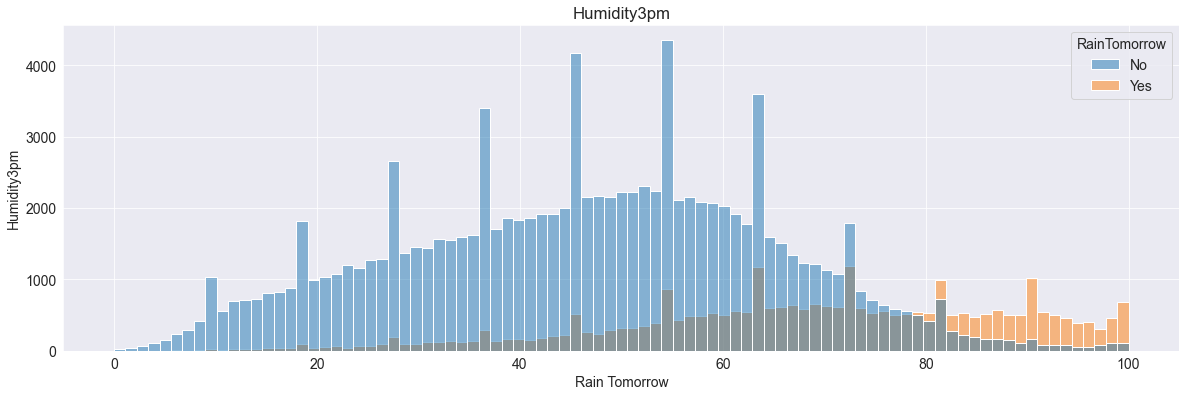

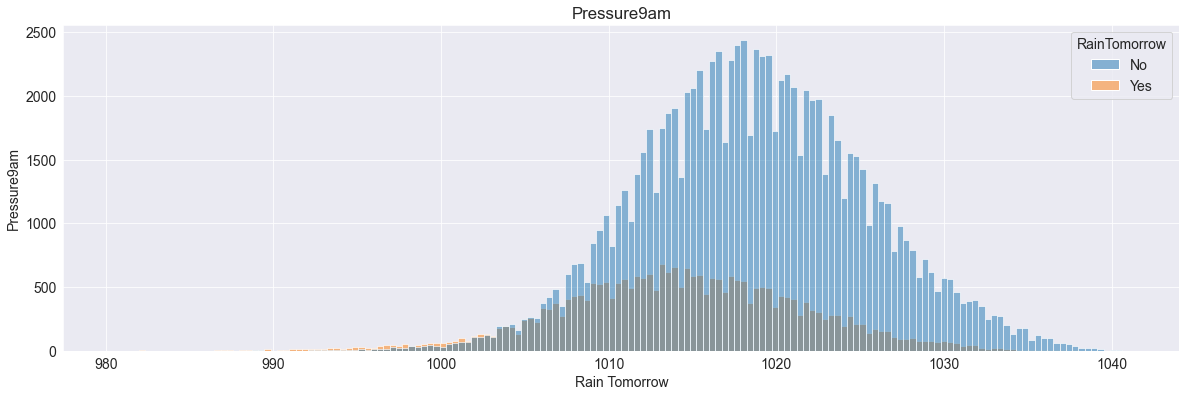

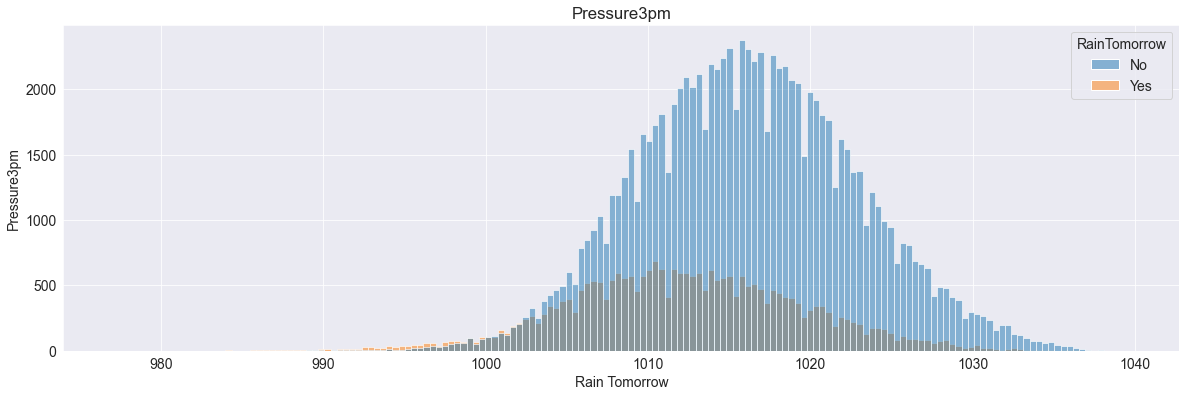

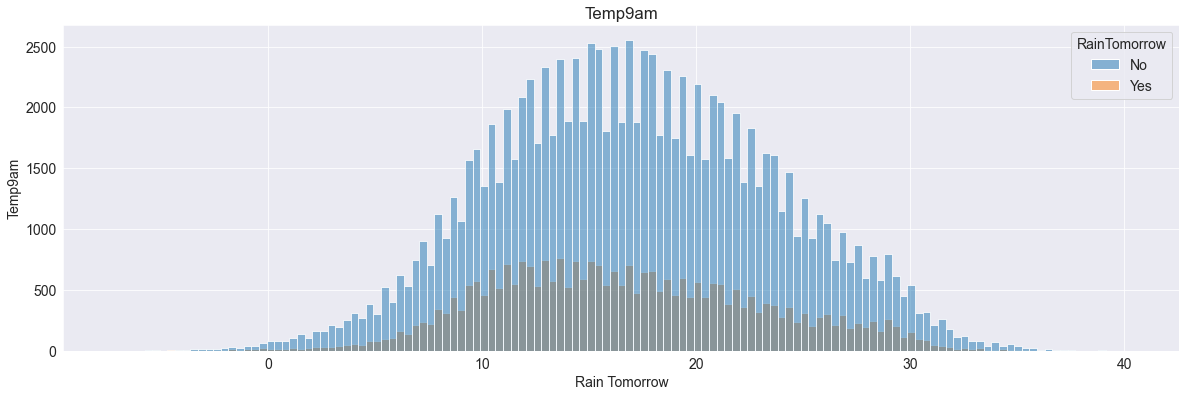

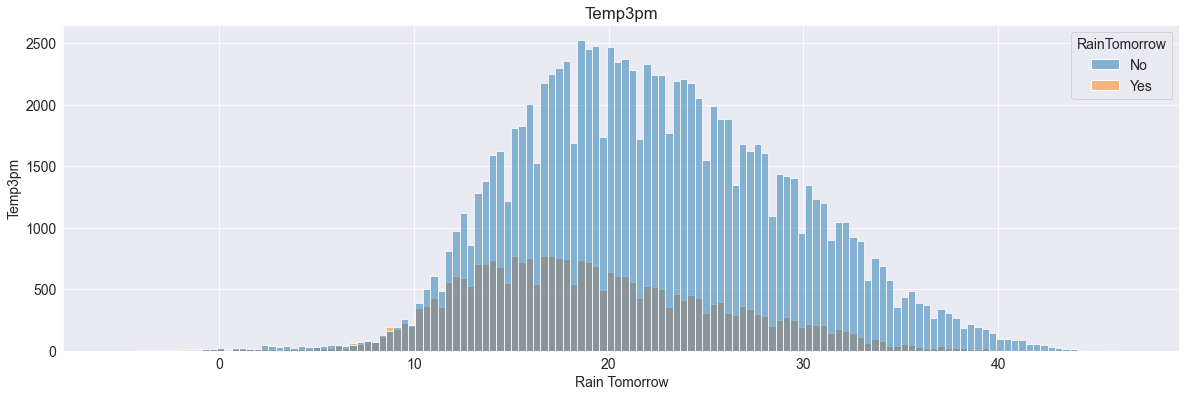

In [37]:
for feature in continuous_feature:
    sns.histplot(x=feature, hue='RainTomorrow', data=df)
    plt.title(feature)
    plt.xlabel('Rain Tomorrow')
    plt.ylabel(feature)
    plt.show()

Some of the features are not normally distributed

### Further Analysis 

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Temp3pm'>

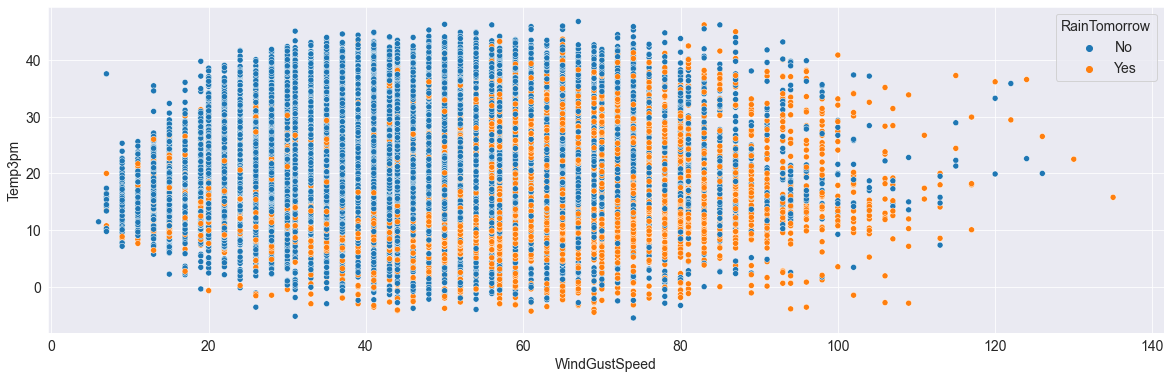

In [38]:
sns.scatterplot(x='WindGustSpeed', y='Temp3pm', data=df, hue='RainTomorrow')

<AxesSubplot:xlabel='Temp9am', ylabel='Temp3pm'>

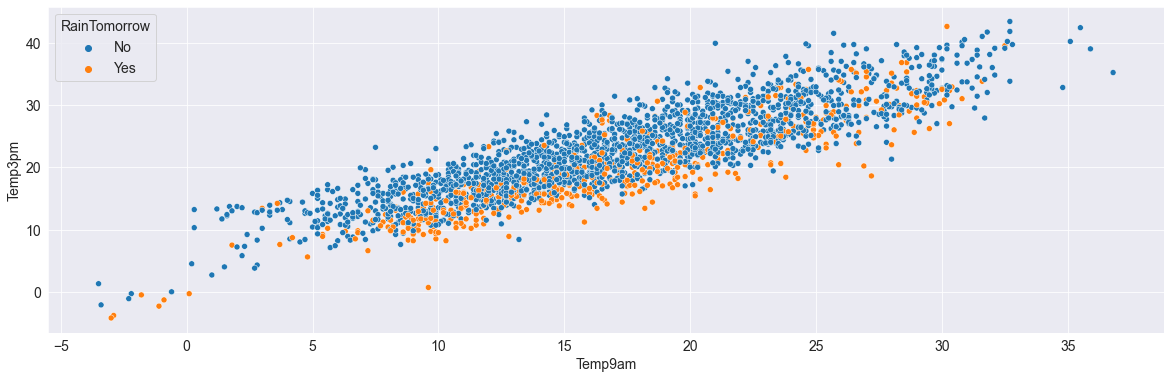

In [39]:
sns.scatterplot(x='Temp9am', y='Temp3pm', data=df.sample(2500), hue='RainTomorrow')

<AxesSubplot:xlabel='Rainfall', ylabel='MaxTemp'>

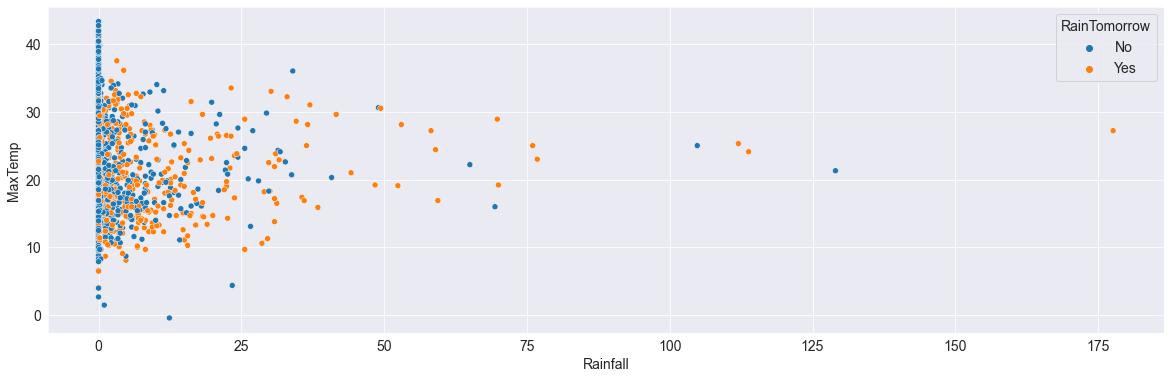

In [40]:
sns.scatterplot(x='Rainfall', y='MaxTemp', data=df.sample(2500), hue='RainTomorrow')

<AxesSubplot:xlabel='Sunshine', ylabel='MinTemp'>

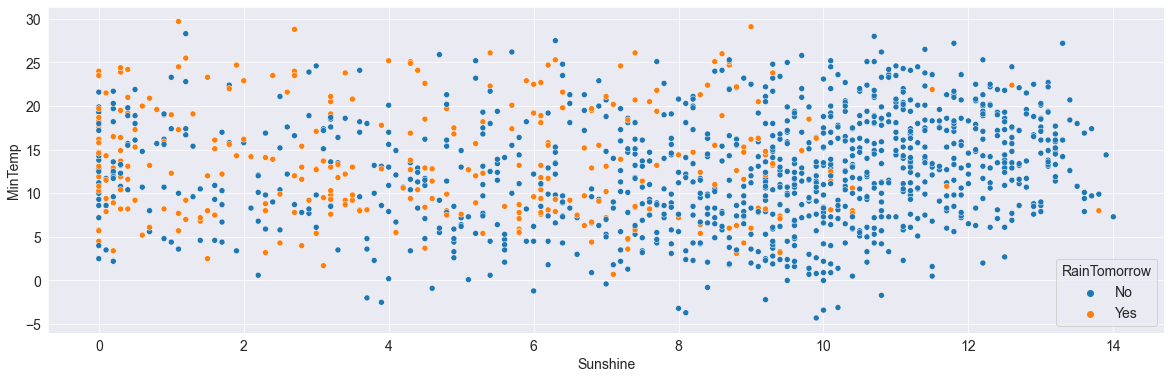

In [41]:
sns.scatterplot(x='Sunshine', y='MinTemp', data=df.sample(2500), hue='RainTomorrow')

<AxesSubplot:xlabel='Temp9am', ylabel='Humidity9am'>

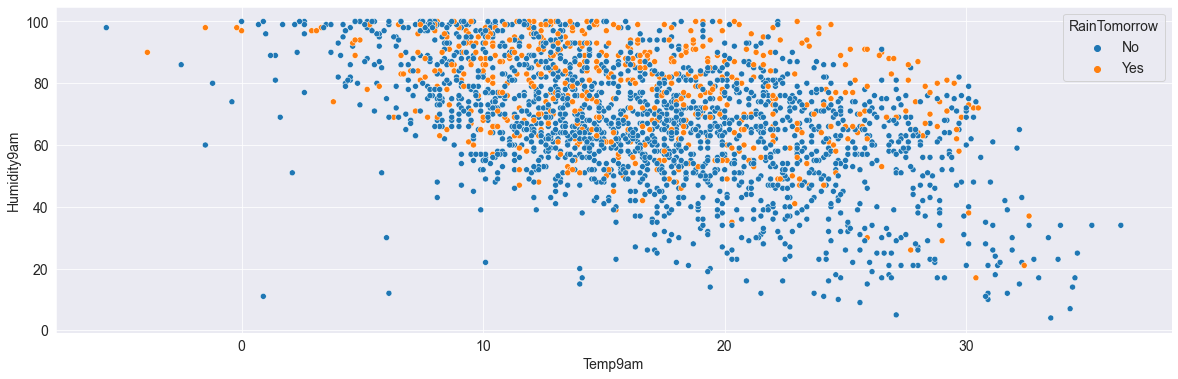

In [42]:
sns.scatterplot(x='Temp9am', y='Humidity9am', data=df.sample(2500), hue='RainTomorrow')

<AxesSubplot:xlabel='Pressure3pm', ylabel='Humidity3pm'>

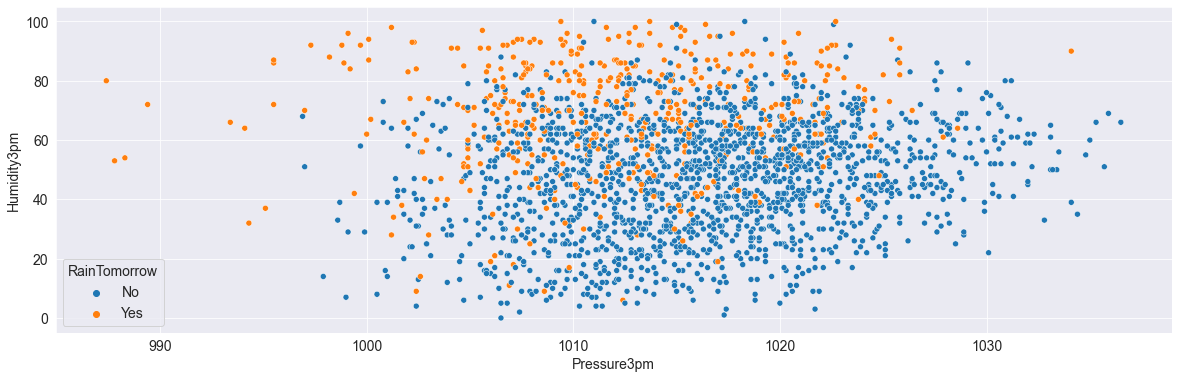

In [43]:
sns.scatterplot(x='Pressure3pm', y='Humidity3pm', data=df.sample(2500), hue='RainTomorrow')

<AxesSubplot:xlabel='Cloud9am', ylabel='Temp3pm'>

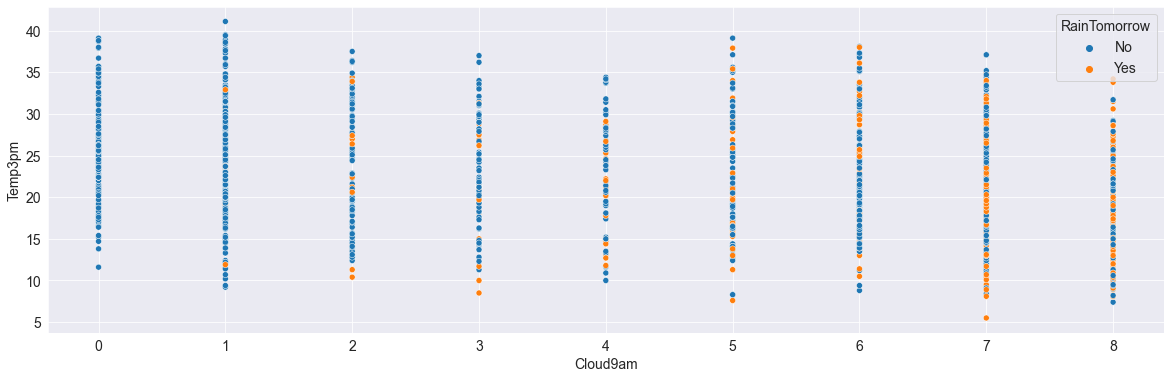

In [44]:
sns.scatterplot(x='Cloud9am', y='Temp3pm', data=df.sample(2500), hue='RainTomorrow')

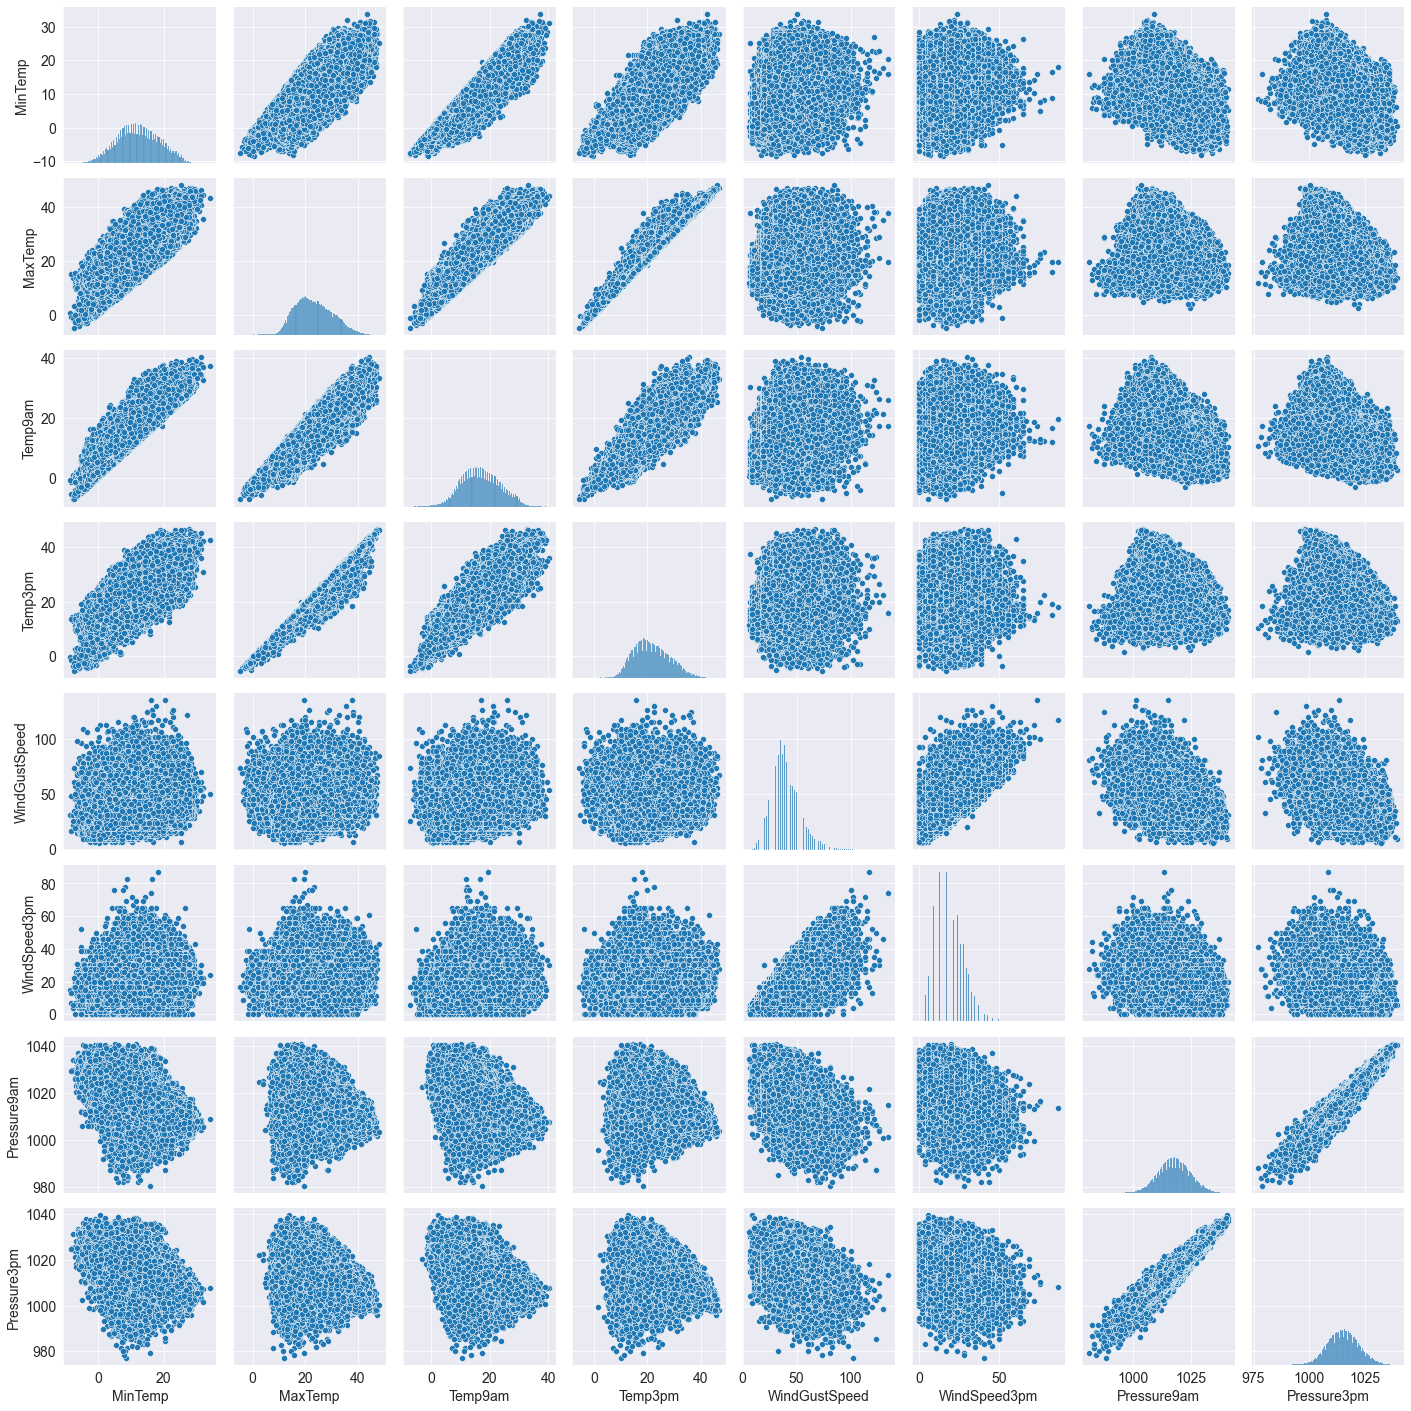

In [45]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

## Conclusion:
- Portland has highest no: of records of rainfall.
- When the WidGustDir is from North, the chances of rain tomorrow is high.
- Rain Today and Rain Tomorrow are positively correlated.
- Most of the numerical features contain outlier
- As the WindGustSpeed increases at 3am with minimum temperature, The chances of rain Tomorrow is high.
- Temp9am and Temp3pm and Temp9am are positively correlated but at certain limit.
- Some of the data of 2008 is missing.

# Feature Engineering

## Train Test Split

In [46]:
X = df.drop(['Date','RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
X_train.shape

(112629, 21)

In [50]:
X_test.shape

(28158, 21)

In [51]:
y_train.shape

(112629,)

In [52]:
y_test.shape

(28158,)

In [53]:
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object

### Handling Missing values in Numerical Features

In [54]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [55]:
X_train[numerical].isnull().sum()

MinTemp            366
MaxTemp            247
Rainfall             0
Evaporation      47874
Sunshine         53533
WindGustSpeed     7237
WindSpeed9am       857
WindSpeed3pm      2018
Humidity9am       1209
Humidity3pm       2768
Pressure9am      11007
Pressure3pm      11032
Cloud9am         42194
Cloud3pm         44994
Temp9am            529
Temp3pm           2083
dtype: int64

In [56]:
X_test[numerical].isnull().sum()

MinTemp            102
MaxTemp             60
Rainfall             0
Evaporation      11820
Sunshine         13272
WindGustSpeed     1868
WindSpeed9am       198
WindSpeed3pm       513
Humidity9am        308
Humidity3pm        733
Pressure9am       2736
Pressure3pm       2737
Cloud9am         10431
Cloud3pm         11100
Temp9am            127
Temp3pm            541
dtype: int64

In [57]:
for feature in numerical:
    if X_train[feature].isnull().mean()>0:
        print(feature, round(X_train[feature].isnull().mean(),4))

MinTemp 0.0032
MaxTemp 0.0022
Evaporation 0.4251
Sunshine 0.4753
WindGustSpeed 0.0643
WindSpeed9am 0.0076
WindSpeed3pm 0.0179
Humidity9am 0.0107
Humidity3pm 0.0246
Pressure9am 0.0977
Pressure3pm 0.0979
Cloud9am 0.3746
Cloud3pm 0.3995
Temp9am 0.0047
Temp3pm 0.0185


In [58]:
for df1 in [X_train, X_test]:
    for feature in numerical:
        median = X_train[feature].median()
#         df1[feature+'nan'] = np.where(df1[feature].isnull(),1,0)
        df1[feature].fillna(median,inplace =True)

In [59]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [60]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### Handling Missing values in Categorical Features

In [61]:
categorical_cols = [feature for feature in X_train.columns if X_train[feature].dtype == 'O']
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [62]:
X_train[categorical_cols].isnull().sum()

Location          0
WindGustDir    7285
WindDir9am     7754
WindDir3pm     2916
RainToday         0
dtype: int64

In [63]:
X_test[categorical_cols].isnull().sum()

Location          0
WindGustDir    1878
WindDir9am     1906
WindDir3pm      754
RainToday         0
dtype: int64

In [64]:
X_train[categorical_cols] = X_train[categorical_cols].fillna('Missing')

In [65]:
X_train[categorical_cols].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [66]:
X_test[categorical_cols] = X_test[categorical_cols].fillna('Missing')

In [67]:
X_test[categorical_cols].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [68]:
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [69]:
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [70]:
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [71]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [72]:
X_train[categorical_cols].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
93277,GoldCoast,NNE,SW,NNW,No
140976,Darwin,NW,NE,N,No
43033,Wollongong,SSE,SSW,SSE,No
70218,Melbourne,SSW,W,S,No
102699,Nuriootpa,WSW,NNE,W,No


In [73]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [74]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1
93277,GoldCoast,13.0,22.7,0.0,4.8,8.5,NNE,24.0,SW,NNW,9.0,13.0,66.0,49.0,1022.7,1018.1,5.0,5.0,18.2,22.3,0,1
140976,Darwin,24.6,33.3,0.0,5.0,11.0,NW,37.0,NE,N,13.0,22.0,68.0,57.0,1012.1,1007.9,4.0,2.0,29.3,32.2,0,1
43033,Wollongong,17.0,22.5,0.2,4.8,8.5,SSE,44.0,SSW,SSE,19.0,31.0,62.0,60.0,1018.7,1016.5,5.0,5.0,19.2,22.0,0,1
70218,Melbourne,14.8,17.8,0.4,3.0,1.2,SSW,39.0,W,S,9.0,19.0,83.0,73.0,1016.9,1018.9,8.0,7.0,15.3,16.3,0,1
102699,Nuriootpa,3.3,15.1,0.2,2.0,4.5,WSW,26.0,NNE,W,7.0,9.0,96.0,66.0,1025.5,1023.6,6.0,5.0,7.9,14.2,0,1


In [75]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [76]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,E,ENE,ESE,Missing,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,Missing,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,Missing,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
93277,13.0,22.7,0.0,4.8,8.5,24.0,9.0,13.0,66.0,49.0,1022.7,1018.1,5.0,5.0,18.2,22.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
140976,24.6,33.3,0.0,5.0,11.0,37.0,13.0,22.0,68.0,57.0,1012.1,1007.9,4.0,2.0,29.3,32.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
43033,17.0,22.5,0.2,4.8,8.5,44.0,19.0,31.0,62.0,60.0,1018.7,1016.5,5.0,5.0,19.2,22.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
70218,14.8,17.8,0.4,3.0,1.2,39.0,9.0,19.0,83.0,73.0,1016.9,1018.9,8.0,7.0,15.3,16.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
102699,3.3,15.1,0.2,2.0,4.5,26.0,7.0,9.0,96.0,66.0,1025.5,1023.6,6.0,5.0,7.9,14.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [77]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [78]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,E,ENE,ESE,Missing,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,Missing,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,Missing,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
4687,11.8,19.3,0.0,4.8,8.5,56.0,31.0,26.0,45.0,41.0,1010.8,1014.7,5.0,5.0,17.0,15.9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
39250,3.9,15.2,0.2,4.8,8.5,22.0,7.0,15.0,93.0,65.0,1021.3,1019.5,7.0,8.0,8.8,14.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
134220,12.1,24.2,0.0,4.8,8.5,35.0,11.0,7.0,73.0,54.0,1010.0,1009.3,5.0,5.0,20.1,24.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19945,17.4,24.7,0.0,4.8,8.5,22.0,7.0,11.0,80.0,60.0,1020.8,1018.0,5.0,5.0,21.1,23.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32360,13.4,26.1,0.0,4.2,9.0,24.0,20.0,13.0,59.0,36.0,1017.6,1014.9,7.0,3.0,17.6,24.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Feature Scaling

In [79]:
cols = X_train.columns

In [80]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,E,ENE,ESE,Missing,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,Missing,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,Missing,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
93277,13.0,22.7,0.0,4.8,8.5,24.0,9.0,13.0,66.0,49.0,1022.7,1018.1,5.0,5.0,18.2,22.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
140976,24.6,33.3,0.0,5.0,11.0,37.0,13.0,22.0,68.0,57.0,1012.1,1007.9,4.0,2.0,29.3,32.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
43033,17.0,22.5,0.2,4.8,8.5,44.0,19.0,31.0,62.0,60.0,1018.7,1016.5,5.0,5.0,19.2,22.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
70218,14.8,17.8,0.4,3.0,1.2,39.0,9.0,19.0,83.0,73.0,1016.9,1018.9,8.0,7.0,15.3,16.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
102699,3.3,15.1,0.2,2.0,4.5,26.0,7.0,9.0,96.0,66.0,1025.5,1023.6,6.0,5.0,7.9,14.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
X_train = pd.DataFrame(X_train, columns=cols)

In [83]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,E,ENE,ESE,Missing,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,Missing,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,Missing,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.507075,0.519849,0.000000,0.033103,0.586207,0.139535,0.069231,0.156627,0.66,0.49,0.697521,0.6560,0.555556,0.555556,0.535865,0.531670,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.780660,0.720227,0.000000,0.034483,0.758621,0.240310,0.100000,0.265060,0.68,0.57,0.522314,0.4928,0.444444,0.222222,0.770042,0.721689,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.601415,0.516068,0.000539,0.033103,0.586207,0.294574,0.146154,0.373494,0.62,0.60,0.631405,0.6304,0.555556,0.555556,0.556962,0.525912,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.549528,0.427221,0.001078,0.020690,0.082759,0.255814,0.069231,0.228916,0.83,0.73,0.601653,0.6688,0.888889,0.777778,0.474684,0.416507,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.278302,0.376181,0.000539,0.013793,0.310345,0.155039,0.053846,0.108434,0.96,0.66,0.743802,0.7440,0.666667,0.555556,0.318565,0.376200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [84]:
X_test = pd.DataFrame(X_test, columns =cols)

In [85]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,E,ENE,ESE,Missing,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,Missing,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,Missing,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.478774,0.455577,0.000000,0.033103,0.586207,0.387597,0.238462,0.313253,0.45,0.41,0.500826,0.6016,0.555556,0.555556,0.510549,0.408829,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.292453,0.378072,0.000539,0.033103,0.586207,0.124031,0.053846,0.180723,0.93,0.65,0.674380,0.6784,0.777778,0.888889,0.337553,0.372361,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.485849,0.548204,0.000000,0.033103,0.586207,0.224806,0.084615,0.084337,0.73,0.54,0.487603,0.5152,0.555556,0.555556,0.575949,0.566219,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.610849,0.557656,0.000000,0.033103,0.586207,0.124031,0.053846,0.132530,0.80,0.60,0.666116,0.6544,0.555556,0.555556,0.597046,0.547025,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.516509,0.584121,0.000000,0.028966,0.620690,0.139535,0.153846,0.156627,0.59,0.36,0.613223,0.6048,0.777778,0.333333,0.523207,0.564299,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [86]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,112629.000000,112629.000000,112629.000000,112629.000000,112629.000000,112629.000000,112629.000000,112629.000000,112629.000000,112629.000000,112629.000000,112629.000000,112629.000000,112629.000000,112629.000000,112629.000000
mean,0.487758,0.529821,0.006324,0.035762,0.554775,0.262792,0.107553,0.224556,0.688735,0.514989,0.614311,0.610554,0.516104,0.522372,0.510044,0.519695
std,0.150893,0.134498,0.022869,0.021918,0.191126,0.101866,0.068170,0.105057,0.189390,0.205532,0.111865,0.107168,0.255332,0.235692,0.136834,0.132045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379717,0.429112,0.000000,0.027586,0.565517,0.193798,0.053846,0.156627,0.570000,0.370000,0.545455,0.542400,0.333333,0.444444,0.411392,0.424184
50%,0.483491,0.517958,0.000000,0.033103,0.586207,0.255814,0.100000,0.228916,0.700000,0.520000,0.614876,0.609600,0.555556,0.555556,0.504219,0.508637
75%,0.596698,0.623819,0.001887,0.037241,0.600000,0.310078,0.146154,0.289157,0.830000,0.650000,0.682645,0.678400,0.666667,0.666667,0.605485,0.608445
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now we have X_train dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

## Model Trainning

In [87]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\New folder\python.exe -m pip install --upgrade pip' command.


In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [93]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

## predicting Results

In [95]:
y_pred_test = model.predict(X_test)
y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

## Accuracy Score

In [98]:
from sklearn.metrics import accuracy_score

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.8519
Test set score: 0.8435


Will continue..